# About Dataset

### Context

We have dataset of tweets classified into one of the 4 classes: 

* Regular
* Sarcasm
* Figurative 
* Irony



In [1]:
import pandas as pd

# Load the training data
train_data_path = 'train.csv'
train_df = pd.read_csv(train_data_path)

# Display the first few rows of the dataframe to understand its structure
train_df.head()


,tweets,class
0,Be aware dirty step to get money #staylight ...,figurative
1,#sarcasm for #people who don't understand #diy...,figurative
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative
3,@wilw Why do I get the feeling you like games?...,figurative
4,-@TeacherArthurG @rweingarten You probably jus...,figurative


In [2]:
class_distribution = train_df['class'].value_counts()
class_distribution

class
figurative    21238
irony         20894
sarcasm       20681
regular       18595
Name: count, dtype: int64

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_tweet(tweet):
    """
    Function to clean the tweet text by removing links, special characters, 
    etc. using simple regex statements and perform text normalization.
    """
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#', '', tweet)
    # Remove punctuations
    tweet = re.sub(r'[^\w\s]', '', tweet)
    # Convert text to lowercase
    tweet = tweet.lower()
    # Remove numbers
    tweet = re.sub(r'\d+', '', tweet)
    # Remove stopwords
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [word for word in tweet_tokens if word not in stopwords.words('english')]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word, pos='v') for word in filtered_words]

    return " ".join(lemmatized_words)

# Apply cleaning to the tweets
train_df['cleaned_tweets'] = train_df['tweets'].apply(clean_tweet)

# Displaying the cleaned tweets
train_df[['tweets', 'cleaned_tweets']].head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sriharsha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sriharsha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sriharsha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tweets,cleaned_tweets
0,Be aware dirty step to get money #staylight ...,aware dirty step get money staylight staywhite...
1,#sarcasm for #people who don't understand #diy...,sarcasm people dont understand diy artattack
2,@IminworkJeremy @medsingle #DailyMail readers ...,dailymail readers sensible always shocker sarc...
3,@wilw Why do I get the feeling you like games?...,get feel like game sarcasm
4,-@TeacherArthurG @rweingarten You probably jus...,probably miss text sarcastic


In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('stopwords')


stemmer = PorterStemmer()


def preprocess_text(text):
    """
    Function to preprocess text by tokenizing, removing stopwords, 
    and applying stemming.
    """
    # Tokenize
    words = nltk.word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    # Stemming
    words = [stemmer.stem(word) for word in words]

    return ' '.join(words)

# Apply cleaning and preprocessing to the tweets
#train_df['cleaned_tweets'] = train_df['tweets'].apply(lambda x: clean_text(x))
train_df['preprocessed_tweets'] = train_df['cleaned_tweets'].apply(lambda x: preprocess_text(x))

# Display the cleaned and preprocessed data
train_df[['tweets', 'cleaned_tweets', 'preprocessed_tweets']].head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sriharsha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sriharsha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tweets,cleaned_tweets,preprocessed_tweets
0,Be aware dirty step to get money #staylight ...,aware dirty step get money staylight staywhite...,awar dirti step get money staylight staywhit s...
1,#sarcasm for #people who don't understand #diy...,sarcasm people dont understand diy artattack,sarcasm peopl dont understand diy artattack
2,@IminworkJeremy @medsingle #DailyMail readers ...,dailymail readers sensible always shocker sarc...,dailymail reader sensibl alway shocker sarcast...
3,@wilw Why do I get the feeling you like games?...,get feel like game sarcasm,get feel like game sarcasm
4,-@TeacherArthurG @rweingarten You probably jus...,probably miss text sarcastic,probabl miss text sarcast


#  Class Distribution Visualization

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

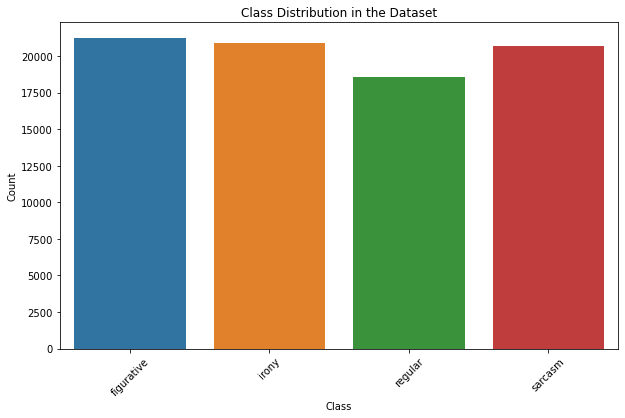

In [5]:
import seaborn as sns
from wordcloud import WordCloud
# 1. Class Distribution Visualization
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='class')
plt.title('Class Distribution in the Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Word Cloud for most frequent words in the dataset

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

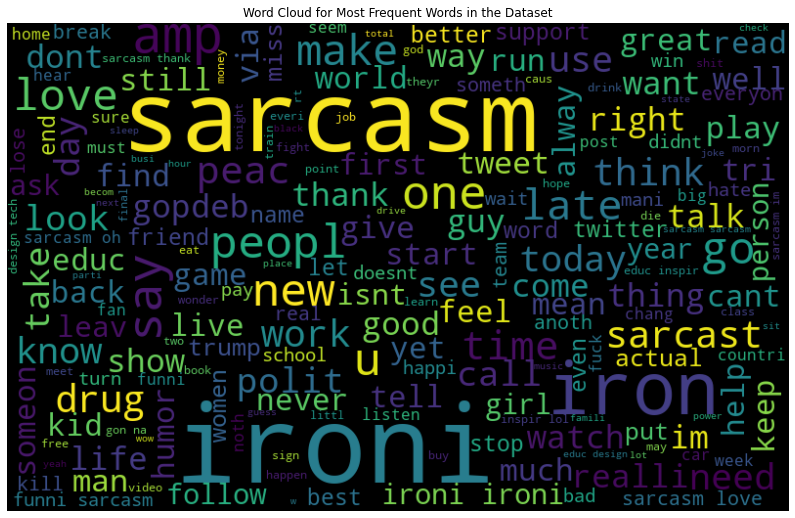

In [7]:

all_words = ' '.join([text for text in train_df['preprocessed_tweets']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for Most Frequent Words in the Dataset')
plt.show()

# Top Words in Each Class

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

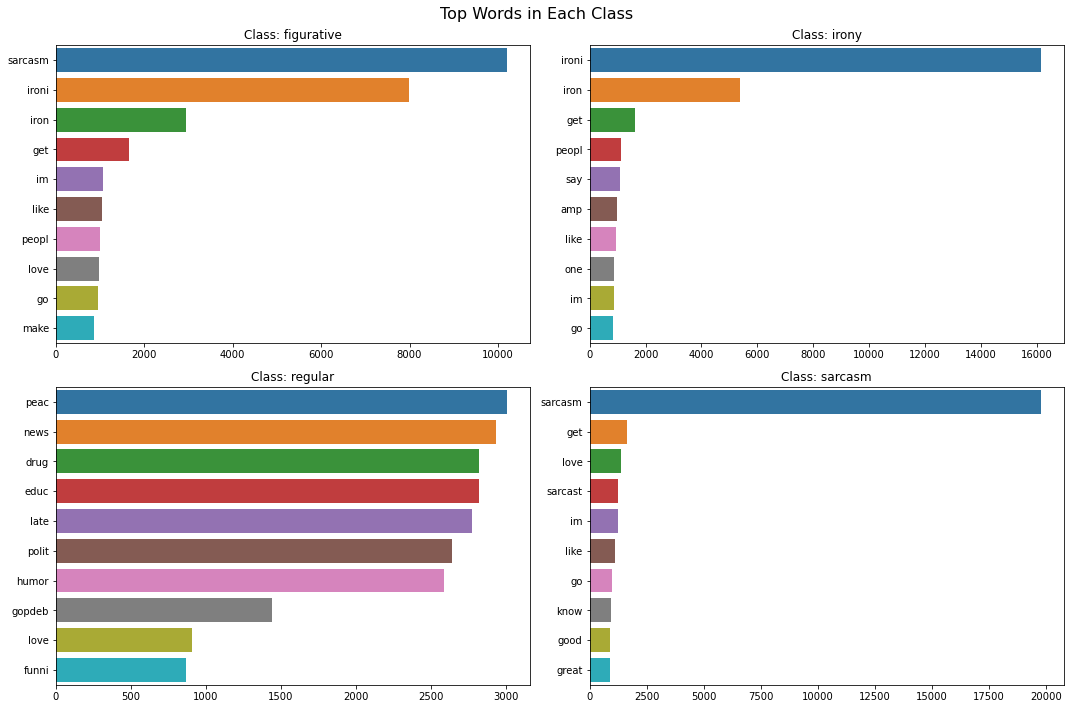

In [8]:

from collections import Counter
def get_top_words(class_name, n=10):
    # Filter the dataframe for the class and concatenate all the tweets
    all_words = ' '.join(text for text in train_df[train_df['class'] == class_name]['preprocessed_tweets'])
    # Count the frequency of each word
    word_freq = Counter(all_words.split())
    # Get the most common words
    return word_freq.most_common(n)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Top Words in Each Class', fontsize=16)
classes = train_df['class'].unique()

for i, class_name in enumerate(classes):
    ax = axes[i//2, i%2]
    top_words = get_top_words(class_name)
    words, counts = zip(*top_words)
    sns.barplot(x=list(counts), y=list(words), ax=ax)
    ax.set_title(f'Class: {class_name}')

plt.tight_layout()
plt.show()

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  

# Apply TF-IDF to the preprocessed text
X = tfidf_vectorizer.fit_transform(train_df['preprocessed_tweets'])

# Assuming 'class' is the column with your target labels
y = train_df['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train

<65126x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 479806 stored elements in Compressed Sparse Row format>

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)

# Train the model on the training data
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy_log =  accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy_log)

report = classification_report(y_test, y_pred, output_dict=True)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


report_df = pd.DataFrame(report).transpose()


Accuracy: 0.7122589362486181

Classification Report:
               precision    recall  f1-score   support

  figurative       0.24      0.05      0.09      4179
       irony       0.66      0.93      0.77      4276
     regular       0.99      1.00      0.99      3696
     sarcasm       0.66      0.90      0.76      4131

    accuracy                           0.71     16282
   macro avg       0.64      0.72      0.65     16282
weighted avg       0.63      0.71      0.64     16282



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

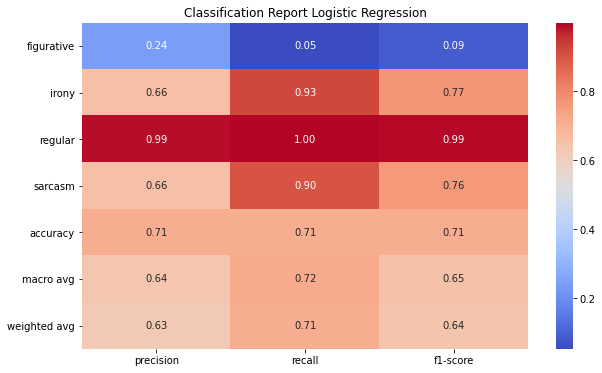

In [12]:
# Drop the 'support' column if you don't want to visualize it
report_df.drop('support', axis=1, inplace=True)

plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Classification Report Logistic Regression')
plt.show()


# SVM 

# Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model.fit(X_train, y_train)


y_pred_decision_tree = decision_tree_model.predict(X_test)


accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)


# Random Forest Model

In [15]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model.fit(X_train, y_train)

y_pred_random_forest = random_forest_model.predict(X_test)

accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)

# Comparision Analysis

In [ ]:
# Plotting accuracies
models = ["LogisticReg", 'Decision Tree', 'Random Forest']
accuracies = [accuracy_log, accuracy_decision_tree, accuracy_random_forest]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()